Dataset Preview:
   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


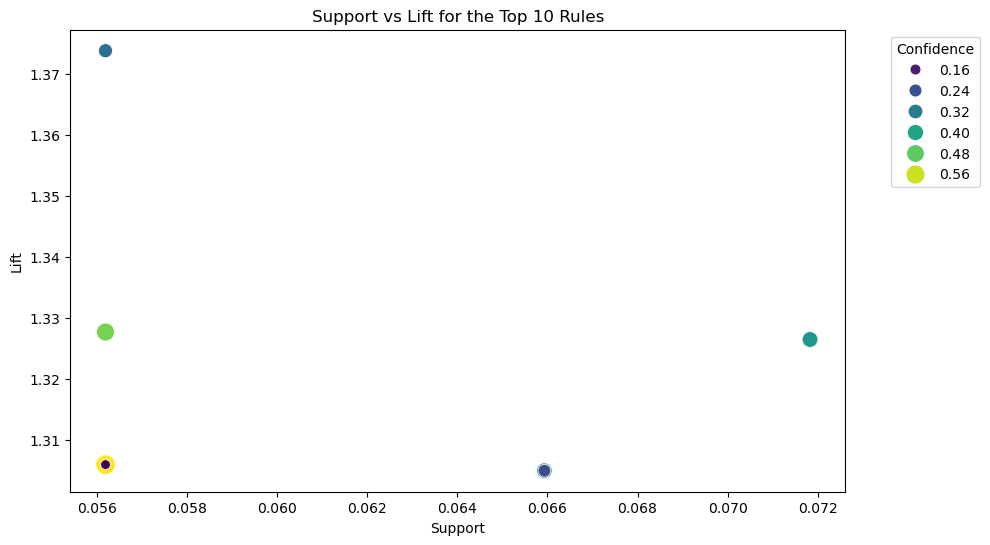

Top 10 Association Rules:
                           antecedents                        consequents  \
197                    (bottled water)     (other vegetables, whole milk)   
192     (other vegetables, whole milk)                    (bottled water)   
195                 (other vegetables)        (whole milk, bottled water)   
194        (whole milk, bottled water)                 (other vegetables)   
239                           (yogurt)     (other vegetables, whole milk)   
234     (other vegetables, whole milk)                           (yogurt)   
193  (other vegetables, bottled water)                       (whole milk)   
196                       (whole milk)  (other vegetables, bottled water)   
246           (rolls/buns, whole milk)                           (yogurt)   
251                           (yogurt)           (rolls/buns, whole milk)   

      support  confidence      lift  
197  0.056183    0.262905  1.373732  
192  0.056183    0.293566  1.373732  
195  0.05618

In [ ]:
# lp15
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Step 1: Data Preprocessing
# Load the dataset
file_path = './Datasets/Order1.csv'  # Adjust the path to your dataset
data = pd.read_csv(file_path)

# Preview the data to understand its structure
print("Dataset Preview:")
print(data.head())

# We assume the dataset contains 'Member_number', 'Date', and 'itemDescription'
# We will group the data by 'Member_number' to represent each transaction
# Each 'Member_number' will have a list of items they purchased.

# Step 2: Generate the List of Transactions
# Group by 'Member_number' and aggregate the 'itemDescription' into a list of items for each transaction
transactions = data.groupby('Member_number')['itemDescription'].apply(list).values.tolist()

# Step 3: Prepare the Transactions for Apriori
# Apply the TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Convert the list into a DataFrame for easier manipulation
df = pd.DataFrame(te_ary, columns=te.columns_)

# Step 4: Train Apriori on the Dataset
# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)  # Adjust the min_support threshold as needed

# Step 5: Generate Association Rules
# Generate the association rules from the frequent itemsets
# Remove num_itemsets=None if error comes here , it is due to version of mlxtend
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=None)

# Step 6: Visualizing the Results
# Plot the top 10 rules by lift
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

# Plot the support vs lift for the top 10 rules
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_rules, x='support', y='lift', size='confidence', hue='confidence', palette='viridis', sizes=(50, 200))
plt.title('Support vs Lift for the Top 10 Rules')
plt.xlabel('Support')
plt.ylabel('Lift')
plt.legend(title='Confidence', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Print the top 10 association rules
print("Top 10 Association Rules:")
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
